# Model Pycaret

_This notebook is made by Katoo_

### Importing libraries

In [21]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns


### Data loading and feature definition
- feat_cols: categorical variables
- numeric_features: numerical variables

In [2]:
# Load your data
df = pd.read_csv('cleaned_subset.csv')

# Define categorical and numeric features
feat_cols = ['district', 'county', 'town/city']
numeric_features = ['old/new', 'year', 'month', 'day', 'property_type_is__D', 'property_type_is__F', 'property_type_is__S', 'property_type_is__T']

### Setting up the pycaret environment

In [3]:
# Set up the PyCaret environment
regression_setup = setup(data=df, target='price', session_id=42, categorical_features=feat_cols, numeric_features=numeric_features)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(1032558, 12)"
4,Transformed data shape,"(1032558, 12)"
5,Transformed train set shape,"(722790, 12)"
6,Transformed test set shape,"(309768, 12)"
7,Numeric features,8
8,Categorical features,3
9,Preprocess,True


### Comparing models and selecting the best one

In [4]:
# Compare all models and select the best one
best_model = compare_models()

# Pull the metrics of compared models
comparison_metrics = pull()
print("Comparison Metrics:")
print(comparison_metrics)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2904,0.1704,0.4128,0.6432,0.0312,0.0238,2.4690
gbr,Gradient Boosting Regressor,0.3012,0.1839,0.4288,0.6150,0.0325,0.0247,29.8890
lr,Linear Regression,0.3156,0.1979,0.4448,0.5858,0.0336,0.0258,2.2450
ridge,Ridge Regression,0.3156,0.1979,0.4448,0.5858,0.0336,0.0258,0.8840
lar,Least Angle Regression,0.3156,0.1979,0.4448,0.5858,0.0336,0.0258,0.8440
br,Bayesian Ridge,0.3156,0.1979,0.4448,0.5858,0.0336,0.0258,0.9950
knn,K Neighbors Regressor,0.3178,0.2006,0.4478,0.5801,0.0339,0.0260,2.7530
huber,Huber Regressor,0.3193,0.2027,0.4502,0.5757,0.0340,0.0261,5.6580
dt,Decision Tree Regressor,0.3439,0.2577,0.5076,0.4606,0.0384,0.0281,1.5050
ada,AdaBoost Regressor,0.3851,0.2619,0.5116,0.4517,0.0386,0.0315,9.0330


Comparison Metrics:
                                    Model     MAE     MSE    RMSE      R2  \
lightgbm  Light Gradient Boosting Machine  0.2904  0.1704  0.4128  0.6432   
gbr           Gradient Boosting Regressor  0.3012  0.1839  0.4288  0.6150   
lr                      Linear Regression  0.3156  0.1979  0.4448  0.5858   
ridge                    Ridge Regression  0.3156  0.1979  0.4448  0.5858   
lar                Least Angle Regression  0.3156  0.1979  0.4448  0.5858   
br                         Bayesian Ridge  0.3156  0.1979  0.4448  0.5858   
knn                 K Neighbors Regressor  0.3178  0.2006  0.4478  0.5801   
huber                     Huber Regressor  0.3193  0.2027  0.4502  0.5757   
dt                Decision Tree Regressor  0.3439  0.2577  0.5076  0.4606   
ada                    AdaBoost Regressor  0.3851  0.2619  0.5116  0.4517   
omp           Orthogonal Matching Pursuit  0.3966  0.2774  0.5267  0.4193   
lasso                    Lasso Regression  0.5450  0.477

### Finalizing the best model
- Retraining the selected model and making it ready for deployment/further testing

In [11]:
# Finalize the best model
final_model = finalize_model(best_model)

### Making predictions and evaluating performance

In [13]:
# Predict on the same dataset (ideally, use train/test split)
predictions = predict_model(final_model, data=df)

# Log metrics from prediction results
prediction_metrics = pull()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2896,0.1694,0.4116,0.6450,0.0312,0.0237


### Saving and loading the model

In [14]:
# Save the model for future use
save_model(final_model, 'best_regression_model')

# Load the saved model when needed
loaded_model = load_model('best_regression_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


### Metrics evaluation and storing

- To evaluate the performance of the model, we use several common regression metrics:
1. R2 score: measures how well the model explains the data
    - value between 1 (= perfect) and 0
2. Mean absolute error: average size of the errors in model's predictions
    - smaller MAE: closer to actual predictions
3. Mean squared error: average of squared difference between predicted and actual values
    - smaller MSE: model's predictions are generally accurate and not making big errors
- Metrics stored in dictionary
- Converting dicktionary into dataframe
- Saving dataframe to csv for future comparison


In [33]:
# Werkelijke prijzen
y_true = df['price']

# Voorspelde prijzen
y_pred = predictions['prediction_label']

# R² Score
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Create a dictionary with the metrics
metrics = {
    "Metric": ["R²", "Mean Absolute Error (MAE)", "Mean Squared Error (MSE)"],
    "Value": [r2, mae, mse]
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Save the DataFrame to a CSV file
metrics_df.to_csv("model_metrics.csv", index=False)


R² Score: 0.6450262978676845
Mean Absolute Error (MAE): 0.28960008135018833
Mean Squared Error (MSE): 0.1694222669765406


### Visualizing Actual vs Predicted Prices

1. Scatter Plot of Actual vs Predicted Prices 
- Shows the relationship between the actual prices and the predicted prices
- Each point represents an observation, with its actual price on the x-axis and predicted price on the y-axis
2. Trend comparison plot of actual vs predicted prices
- Groups prices by month
- Takes average of actual and predicted prices of every month and plots them

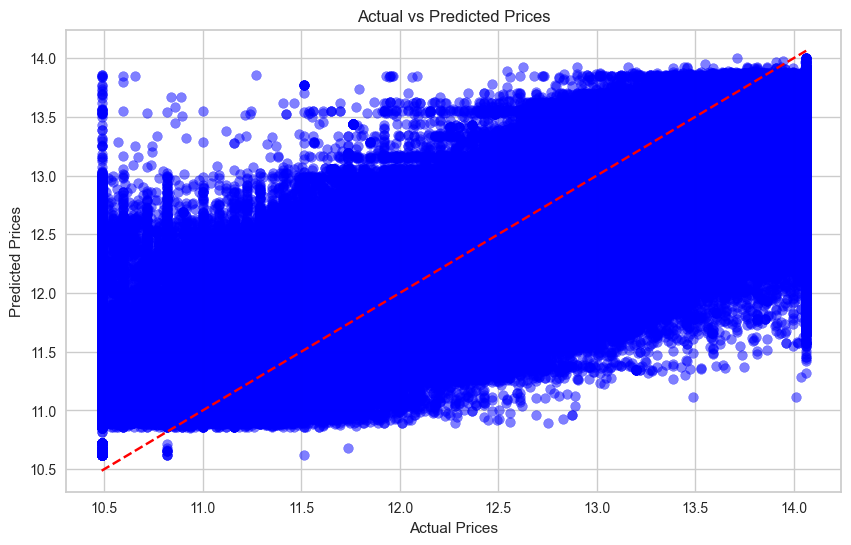

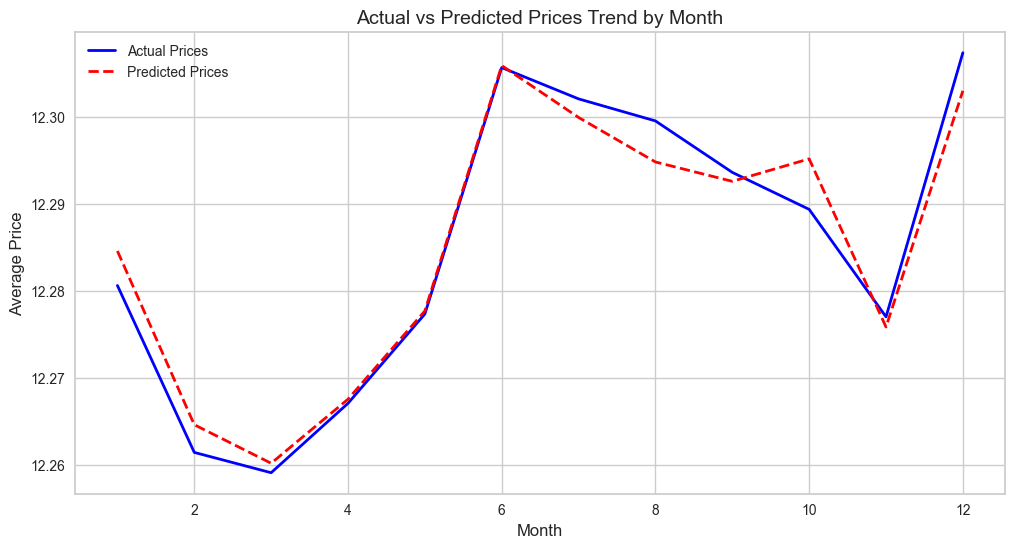

In [ ]:
# Visualize Predicted vs Actual Prices
plt.figure(figsize=(10,6))
plt.scatter(df['price'], predictions['prediction_label'], color='blue', alpha=0.5)
plt.plot([df['price'].min(), df['price'].max()], [df['price'].min(), df['price'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


y_test = df['price']  # actual prices
pycaret_predictions = predictions['prediction_label']  # predicted prices
# Group the actual prices by month and calculate the mean price per month
y_test_monthly = y_test.groupby(df['month']).mean()
# Group the predicted prices by month and calculate the mean predicted price per month
pycaret_predictions_monthly = pycaret_predictions.groupby(df['month']).mean()
plt.figure(figsize=(12, 6))
plt.plot(y_test_monthly.index, y_test_monthly.values, label='Actual Prices', color='blue', linestyle='-', linewidth=2)
plt.plot(pycaret_predictions_monthly.index, pycaret_predictions_monthly.values, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Prices Trend by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
